In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt


import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

Using TensorFlow backend.


In [2]:
toxic_comments = pd.read_excel("NewMetaSanjanaData.xlsx")

In [3]:
print(toxic_comments.shape)

toxic_comments.head()

(313, 4)


,Term clauses,Termination for Cause,Termination for convienience,Termination for insolvency
0,"14. Term, Termination and Amendment. 14.1. No...",1,0,0
1,"14. Term, Termination and Amendment. 14.1. No...",1,0,0
2,9. (a) This Agreement shall continue in force ...,1,1,0
3,6 Termination 6.1 This Agreement shall termina...,1,0,1
4,8.3 This Agreement shall not be varied or canc...,0,0,0


In [4]:
filter = toxic_comments["Term clauses "] != ""
toxic_comments = toxic_comments[filter]
toxic_comments = toxic_comments.dropna()

In [5]:
print(toxic_comments["Term clauses "][168])

32. TERMINATION: In the event i) a party (the "Defaulting Party“) breaches any representation, warranty,  covenanJ or other obliq•ation of this Agreement, and fails to cure the breach after 30 days’ notice, or ii) the Defaulting Party becomes unable to pay its bills as they become due in the ordinary course, a trustee or receiver of  such party’s property is appointed, the Defaulting Party makes an assignment for the benefit of creditors, a petition in bankruptcy is filed by or against the Defaulting Party or the Defaulting Party terminates or liquidates its business, the other party (the "Non-Defaulting Party") will have the option to terminate this Agreement, without further obligation, immediately upon notice of such termination to the Defaulting Party. If the Defaulting Party is SELLER, SELLER will make available for BUYER’S removal any Product, raw materials, or other of BUYER’S property then under SELLER’S control. SELLER further agrees not to encumber such Products in any way. T

In [6]:
toxic_comments_labels = toxic_comments[["Termination for Cause ","Termination for convienience","Termination for insolvency "]]
toxic_comments_labels.head()

,Termination for Cause,Termination for convienience,Termination for insolvency
0,1,0,0
1,1,0,0
2,1,1,0
3,1,0,1
4,0,0,0


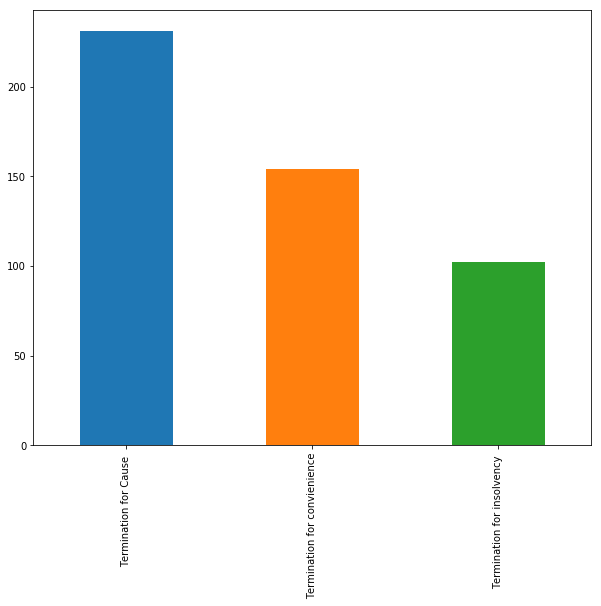

In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

toxic_comments_labels.sum(axis=0).plot.bar()

In [8]:
def preprocess_text(sen):
    
    
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    sentence = sentence.lower()

    return sentence

In [9]:
X = []
sentences = list(toxic_comments["Term clauses "])
for sen in sentences:
    X.append(preprocess_text(sen))

y = toxic_comments_labels.values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 3000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [12]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_split=0.2)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Activation,BatchNormalization
import keras
## create model
model = Sequential()
model.add(Embedding(vocab_size, 300, input_length=3000, weights=[embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
#model_glove.add(LSTM(128))
model.add(keras.layers.BatchNormalization())
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
## Fit train data
#history = model.fit(X_train, y_train, batch_size=128, epochs=80, verbose=1, validation_split=0.2)
model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs = 100)







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 200 samples, validate on 50 samples
Epoch 1/100
200/200 [==============================] - 2s 9ms/step - loss: 0.7564 - acc: 0.6183 - val_loss: 0.7242 - val_acc: 0.7133
Epoch 2/100
200/200 [==============================] - 0s 941us/step - loss: 0.5225 - acc: 0.7400 - val_loss: 0.5995 - val_acc: 0.7400
Epoch 3/100
200/200 [==============================] - 0s 931us/step - loss: 0.4453 - acc: 0.8133 - val_loss: 0.5219 - val_acc: 0.7667
Epoch 4/100
200/200 [==============================] - 0s 929us/step - loss: 0.3632 - acc: 0.8450 - val_loss: 0.4788 - val_acc: 0.7667
Epoch 5/100
200/200 [==============================] - 0s 933us/step - loss: 0.3163 - acc: 0.8700 - val_loss: 0.4369 - val_acc: 0.7867
Epoch 6/100
200/200 [==============================] - 0s 1ms/step 

Epoch 47/100
200/200 [==============================] - 0s 883us/step - loss: 0.0350 - acc: 0.9950 - val_loss: 0.2692 - val_acc: 0.9000
Epoch 48/100
200/200 [==============================] - 0s 877us/step - loss: 0.0286 - acc: 1.0000 - val_loss: 0.2691 - val_acc: 0.8933
Epoch 49/100
200/200 [==============================] - 0s 885us/step - loss: 0.0279 - acc: 0.9967 - val_loss: 0.2703 - val_acc: 0.8933
Epoch 50/100
200/200 [==============================] - 0s 884us/step - loss: 0.0292 - acc: 0.9967 - val_loss: 0.2708 - val_acc: 0.8933
Epoch 51/100
200/200 [==============================] - 0s 887us/step - loss: 0.0292 - acc: 0.9950 - val_loss: 0.2687 - val_acc: 0.9000
Epoch 52/100
200/200 [==============================] - 0s 877us/step - loss: 0.0382 - acc: 0.9933 - val_loss: 0.2663 - val_acc: 0.8933
Epoch 53/100
200/200 [==============================] - 0s 873us/step - loss: 0.0239 - acc: 0.9967 - val_loss: 0.2682 - val_acc: 0.8933
Epoch 54/100
200/200 [==========================

In [14]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

63/63 [==============================] - 0s 509us/step
Test Score: 0.19980842158907935
Test Accuracy: 0.9312169372089325


In [15]:
import matplotlib.pyplot as plt
import re

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [16]:
import pickle

model.save('modelmultilabel.h5')

with open('tokenizermultilabel.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
sent="20. TERMINATION.  Contract Renewal Term  = Optional Renewal Conditions for Renewal = CW may renew for three additional 1 year terms in its sole discretion (a) Prior to the termination or expiration and non-renewal of the Term of the Agreement, C&W has the right, in its sole discretion, to extend the Service Term of any then-current Service Addendum under this Agreement for an additional period of one (1) year, with C&W having the right to repeat such extension up to three times up to a total extension of the Term of no more than three years. (b)  Each extension of the term of any Service Addendum in accordance with subsection (a), shall be on the same terms and conditions of the Agreement (including pricing) as exist at the point in time when the extension takes effect. Right to Terminate  = At Will (CW Only) (c) C&W has the right, in its sole and absolute discretion and without payment of any penalty, to terminate the Agreement, in whole or in part, at any time during the term hereof upon thirty (30) days prior written Termination Notice = 30 days notice to Contractor. Any termination of this Agreement under this provision shall not affect the Parties\' rights and obligations thereunder that accrued prior to the date of termination, which shall survive such termination. (d)  If Contractor shall default in the performance of any of its obligations under the Agreement (including without limitation violation of any law), then, C&W has the right, without payment of any penalty, to terminate this Master Agreement, in whole or in part, immediately upon written notice to Contractor. Furthermore, the Agreement and C&W\’s obligation to pay any compensation to Contractor hereunder shall terminate immediately with respect to all transactions if the continuation of the Agreement would violate Applicable Anti-Corruption Laws (as such term is defined in Section 33(b) below). (e)  If a receiver, liquidator or trustee for Contractor shall be appointed by court order; or a petition shall be filed against Contractor under any bankruptcy, reorganization or insolvency law; or Contractor shall file a petition in voluntary bankruptcy or shall request reorganization under any provision of voluntary bankruptcy, reorganization or insolvency laws; or if Contractor shall make an assignment for the benefit of creditors, then the entire Agreement shall immediately terminate upon the happening of any such event. (f)  For clarity, any right of C&W to terminate the Agreement also allows C&W to terminate a Service Addendum, in whole or in part, without having to terminate the Agreement or any other Service Addendum. Termination of a Service Addendum shall not affect any other Service Addendum. Indemnity = Vendor Indemnity when this provision contains \"C&W Indemnitees\" only) 21. INDEMNIFICATION. If \"Contractor Indemnitees\" is found as well as \"C&W Indemnitees\" = Cross Indemnity If \"Contractor Indemnitees\" alone then = Cushman Indemnity (a) Contractor shall, to the fullest extent permitted by law, indemnify and hold harmless C&W, its Clients and their respective subsidiaries, Affiliates, shareholders, directors, officers, partners and employees (the “C&W Indemnitees”) from and against any and all liability, claims and demands on account of damage C&W CONFIDENTIAL Master Agreement Page 8 DocuSign Envelope ID: 39B691A7490BDAB-B96C-742E3F6F4DD9D903745-1FE3-4478-BDD1-6A6C5BE7F7EC to any property or injury to persons including death resulting therefrom, losses, damages, expenses (including attorneys’ fees and investigation costs), payments, recoveries and judgments in connection therewith, to the extent arising out of or caused in any manner by (i) any acts or omissions of Contractor, its Affiliates and Contractor Personnel; (ii) the performance or failure to perform any Services under the Agreement; (iii) the breach of any representation or warranty or covenant or condition set forth in the Agreement by Contractor, its Affiliates or Contractor Personnel; (iv) the use of any C&W’s tools or equipment by Contractor, its Affiliates or Contractor Personnel; (v) a breach of any obligation for which Contractor is responsible as employer or contractor of Contractor Personnel, including (as examples): (A) Contractor’s employment of one or more of Contractor’s employees; (B) any claim alleging that any of the C&W Indemnitees should be deemed the “employer” or “joint employer” of any Contractor Personnel, and (C) any claim by any member or former member of Contractor Personnel, alleging unfair dismissal, breach of contract, discrimination on the grounds of sex, race, disability, sexual orientation, religion or belief, age or equal pay; (vi) the violation of any applicable law, order, or regulation by Contractor, its Affiliates or Contractor Personnel; or (vii) any claim arising from or relating to work-related injuries of Contractor or Contractor Personnel (including the employees, agents, subcontractors and suppliers of Contractor Personnel). (b)  In addition, Contractor shall indemnify, hold harmless and defend, at its sole cost and expense, the C&W Indemnitees from any loss, damage, expense (including attorneys’ fees and costs), payment, recovery and judgment arising out of any claim or threatened claim, alleging that any Services furnished hereunder infringe upon or violate a patent, copyright, trademark, trade secret or other proprietary right of any third party. C&W, at its sole cost and expense, shall have the right to be represented in any such action or proceeding by independent counsel of C&W's own choice. Contractor's liability under this subsection (b) shall survive the expiration or termination of the Agreement, but this shall not be construed to mean that Contractor's liability does not survive as to other provisions of the Agreement. (c) Contractor shall, at its own expense, defend any and all actions brought against C&W based upon any of the foregoing and shall pay all attorneys’ fees and all other expenses, and promptly discharge any judgments, settlements or compromises arising therefrom. No third party claim or action may be settled or compromised by Contractor without C&W’s prior written consent, unless the settlement or compromise includes a release of all claims against C&W and Client as applicable by the party bringing the claim or action; and C&W will have the right at its sole expense to participate in the legal proceeding with counsel of its own choosing. C&W will assist and cooperate in the defense as reasonably requested by Contractor, at Contractor’s expense. (d) Contractor's liability under this Section 21 (Indemnification) shall survive the expiration or termination of the Agreement, but this shall not be construed to mean that Contractor's liability does not survive as to other provisions of the Agreement."

In [18]:
import tensorflow as tf
from keras.models import load_model
from keras import backend as K
from keras.preprocessing.sequence import pad_sequences
import re

import pickle
# with tf.Graph().as_default():
#     with tf.Session() as sess:
model_glove1= load_model('modelmultilabel.h5')
with open('tokenizermultilabel.pkl', 'rb') as handle:
    tokenizer1 = pickle.load(handle)


max_len =3000
#         K.set_session(sess)
#         K.graph = tf.get_default_graph()
#         K.graph.finalize()


sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
sentence = re.sub('[^a-zA-Z]', ' ', sent)
sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
sentence = re.sub(r'\s+', ' ', sentence)



X = tokenizer1.texts_to_sequences([sent])
padded = pad_sequences(X, maxlen=max_len)
pred = model_glove1.predict(padded)

labels=['cause','convinience','insolvency']
print(pred)

print(type(pred))


[[0.9998361  0.99641645 0.99686134]]
<class 'numpy.ndarray'>


In [ ]:
import numpy
pred_list=pred.tolist()
pred_list=pred_list[0]
pred_list.append(1)

In [ ]:
print(len(pred_list))

In [19]:
df1 = pd.read_excel("RightToTerminateDataExcel.xlsx")

In [22]:
Para_lsit=df1['Paragraphs'].tolist()

In [23]:
print(len(Para_lsit))

616


In [40]:
cause=[]
convinience=[]
insolvency=[]
cause_score=[]
convienience_score=[]
insolvency_score=[]
for i in Para_lsit:
    
    i=i.lower()
    
    sent = re.sub('[^A-Za-z0-9]+', ' ', i)
    sentence = re.sub('[^a-zA-Z]', ' ', sent)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)



    X = tokenizer1.texts_to_sequences([sent])
    padded = pad_sequences(X, maxlen=max_len)
    pred = model_glove1.predict(padded)

    labels=['cause','convinience','insolvency']
    
    pred_list=pred.tolist()
    pred_list=pred_list[0]
    print(pred_list)
    #print(pred_list)
    cause_score.append(pred_list[0])
    convienience_score.append(pred_list[1])
    insolvency_score.append(pred_list[2])

        
    #print(cause_score,convienience_score,insolvency_score)
    
print(len(cause))
print(len(cause_score))
print(len(convinience))
print(len(convienience_score))
print(len(insolvency))
print(len(insolvency_score))
df1['Cause_Score']=cause_score
df1['Convienience_Score']=convienience_score
df1['Insolvency']=insolvency_score



df1.to_excel(r'/home/dev2/Sanjana/renewal_option/NewMetadataoutput.xlsx',engine='xlsxwriter')
print("over")

    
    

[0.992739737033844, 0.9993208646774292, 0.0009416649118065834]
[0.5212133526802063, 0.17842867970466614, 0.0024421538691967726]
[0.3709602952003479, 0.004045210313051939, 0.00013880585902370512]
[0.07672332972288132, 3.865048711304553e-05, 0.006821661256253719]
[0.016743047162890434, 0.21628496050834656, 0.0021919547580182552]
[0.0032185413874685764, 0.9972188472747803, 0.0012357468949630857]
[0.850509524345398, 0.23202957212924957, 0.015761908143758774]
[0.9786980748176575, 0.0003317935043014586, 5.314573354553431e-05]
[0.9325240850448608, 0.008455791510641575, 0.002211648505181074]
[0.9219906330108643, 0.032524749636650085, 0.00015623467334080487]
[0.015127175487577915, 0.0020533499773591757, 0.9993916749954224]
[0.005329446867108345, 0.11234111338853836, 9.774774662218988e-05]
[0.00017486650904174894, 0.9981491565704346, 0.0009331884211860597]
[0.6124398112297058, 0.11163876205682755, 0.04220378398895264]
[0.888035774230957, 0.9516132473945618, 0.02087852917611599]
[0.00932941492646

[0.000197971923626028, 0.0024987130891531706, 0.0003779465623665601]
[0.04024699330329895, 0.0006915026460774243, 0.0006033446989022195]
[0.028966011479496956, 0.0075058164075016975, 0.001252410700544715]
[0.001659697387367487, 0.005597513634711504, 0.00039174314588308334]
[0.012142169289290905, 0.0010430216789245605, 0.0020749340765178204]
[0.005262983962893486, 0.011228910647332668, 0.0006540789036080241]
[0.0019861345645040274, 0.043227147310972214, 0.004829013720154762]
[0.0632229596376419, 0.003119139699265361, 0.00019709215848706663]
[0.006924313958734274, 0.005055309738963842, 6.2444647483062e-05]
[0.01365427952259779, 0.0007383879856206477, 0.0004108741704840213]
[0.046181827783584595, 0.0009232848533429205, 7.372346590273082e-05]
[0.34008508920669556, 0.07329454272985458, 0.0013577206991612911]
[0.018611708655953407, 0.04110299050807953, 0.024730272591114044]
[0.05046522989869118, 0.5558721423149109, 0.0014227647334337234]
[0.0003060854796785861, 0.14590518176555634, 0.0002763

[0.008561264723539352, 0.00253534154035151, 0.003399430075660348]
[0.9966291785240173, 0.0033620414324104786, 0.9981252551078796]
[0.9750266671180725, 0.8416867852210999, 0.021031493321061134]
[0.0008309991098940372, 0.993970513343811, 0.006631182972341776]
[0.9247463345527649, 0.5869420170783997, 0.5514894127845764]
[0.0017707995139062405, 0.029569189995527267, 0.0012762673432007432]
[0.9699738025665283, 0.9927347898483276, 0.002159333089366555]
[0.9979568719863892, 0.9880687594413757, 0.0036837132647633553]
[0.9987496137619019, 0.9934384226799011, 0.9994909763336182]
[0.0009126577060669661, 0.00031350317294709384, 5.342857548384927e-05]
[0.0024427336174994707, 0.01083393581211567, 0.0024301589000970125]
[0.7734529972076416, 0.060421332716941833, 0.031574420630931854]
[0.34641286730766296, 0.7420452237129211, 0.0005806451663374901]
[0.998140811920166, 0.9911973476409912, 0.9992033839225769]
[0.0015244334936141968, 0.9980776309967041, 0.0008159307180903852]
[0.005800848826766014, 0.641

[0.04315393045544624, 0.08266682177782059, 0.0010621981928125024]
[0.0024202587082982063, 0.0008921403205022216, 0.0005446258001029491]
[0.996743381023407, 0.0038142837584018707, 0.001440612250007689]
[0.005207922775298357, 0.004756477661430836, 0.0019909522961825132]
[0.9856541752815247, 0.12269594520330429, 0.9698340892791748]
[0.07405319809913635, 0.0005536027601920068, 0.006766615901142359]
[0.9921485185623169, 0.0021827900782227516, 0.999982476234436]
[0.009875350631773472, 0.01927599497139454, 1.0271297469444107e-05]
[0.0037603406235575676, 0.9958555102348328, 0.9976623058319092]
[0.044074758887290955, 0.9935623407363892, 0.9999481439590454]
[0.0015103702899068594, 0.05940309166908264, 0.0002669231325853616]
[0.9881659746170044, 0.9997366070747375, 0.0023544500581920147]
[0.6922406554222107, 0.014730128459632397, 0.0014355758903548121]
[0.7317146062850952, 0.22897237539291382, 0.9786248803138733]
[0.02271258644759655, 0.0077813793905079365, 5.345670797396451e-05]
[0.2301958948373

[0.03241909667849541, 0.9879064559936523, 9.243196836905554e-05]
[0.1168917715549469, 0.1003715917468071, 4.352350879344158e-05]
[0.5278176665306091, 0.14114269614219666, 0.0011296354932710528]
[0.9958730340003967, 0.9932333827018738, 0.9993417859077454]
[0.8351986408233643, 0.5511698722839355, 0.028598913922905922]
[0.9951777458190918, 0.0008262307965196669, 0.9998811483383179]
[0.9928094148635864, 0.9873912930488586, 0.00016707695613149554]
[0.0006510150269605219, 0.02955806441605091, 0.0004248185723554343]
[0.9982548356056213, 0.002067746827378869, 0.008270664140582085]
[0.9927558302879333, 0.054784197360277176, 0.0011559812119230628]
[0.09410298615694046, 0.04448718950152397, 0.01509923953562975]
[0.9973551034927368, 0.9859695434570312, 0.9999969005584717]
[0.9954324960708618, 0.9874448776245117, 0.9999984502792358]
[0.008609563112258911, 0.07772719115018845, 0.0018296994967386127]
[0.997721254825592, 0.0007377603324130177, 0.0003253775357734412]
[0.9961037635803223, 0.046605866402

In [29]:
print("over")

over


In [ ]:
sent = toxic_comments['Term clauses '][8]
sent

In [ ]:
toxic_comments.iloc[[8]]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
labels = [
     ("a_yes", "a_no"),
     ("b_yes", "b_no"),
  ("yes", "no")
 ]
mlb = MultiLabelBinarizer()
mlb.fit(labels)

In [ ]:
mlb.classes_

In [ ]:
mlb.transform([("yes", "a_yes")])

In [ ]:
a=[]
a.append(4)

In [ ]:
print(a)